In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
x = df.drop('Outcome', axis=1)
y = df['Outcome']

<Axes: xlabel='Outcome', ylabel='count'>

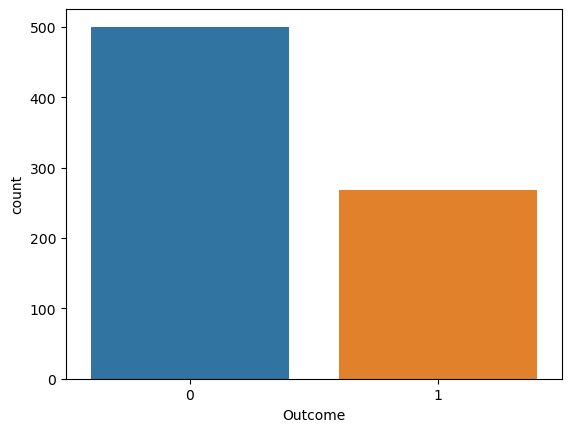

In [4]:
sns.countplot(x=y)

In [5]:
y.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, random_state=42)

In [8]:
x.shape 

(768, 8)

In [9]:
x_train.shape

(576, 8)

In [10]:
x_test.shape

(192, 8)

In [11]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [12]:
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay

In [13]:
y_pred = knn.predict(x_test)

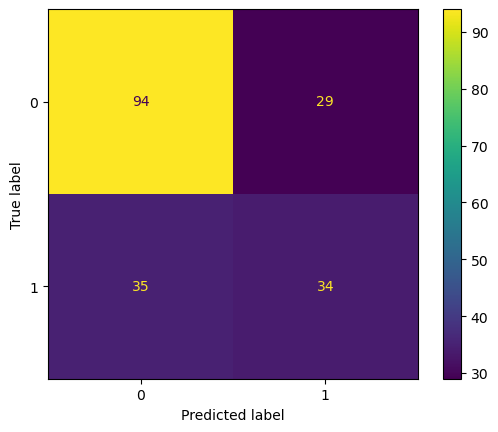

In [14]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [15]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.76      0.75       123
           1       0.54      0.49      0.52        69

    accuracy                           0.67       192
   macro avg       0.63      0.63      0.63       192
weighted avg       0.66      0.67      0.66       192



In [16]:
import matplotlib.pyplot as plt
import numpy as np

In [17]:
error = []
for k in range(1, 41): 
    knn = KNeighborsClassifier(n_neighbors=k) 
    knn.fit(x_train, y_train) 
    pred = knn.predict(x_test) 
    error.append(np.mean(pred != y_test))

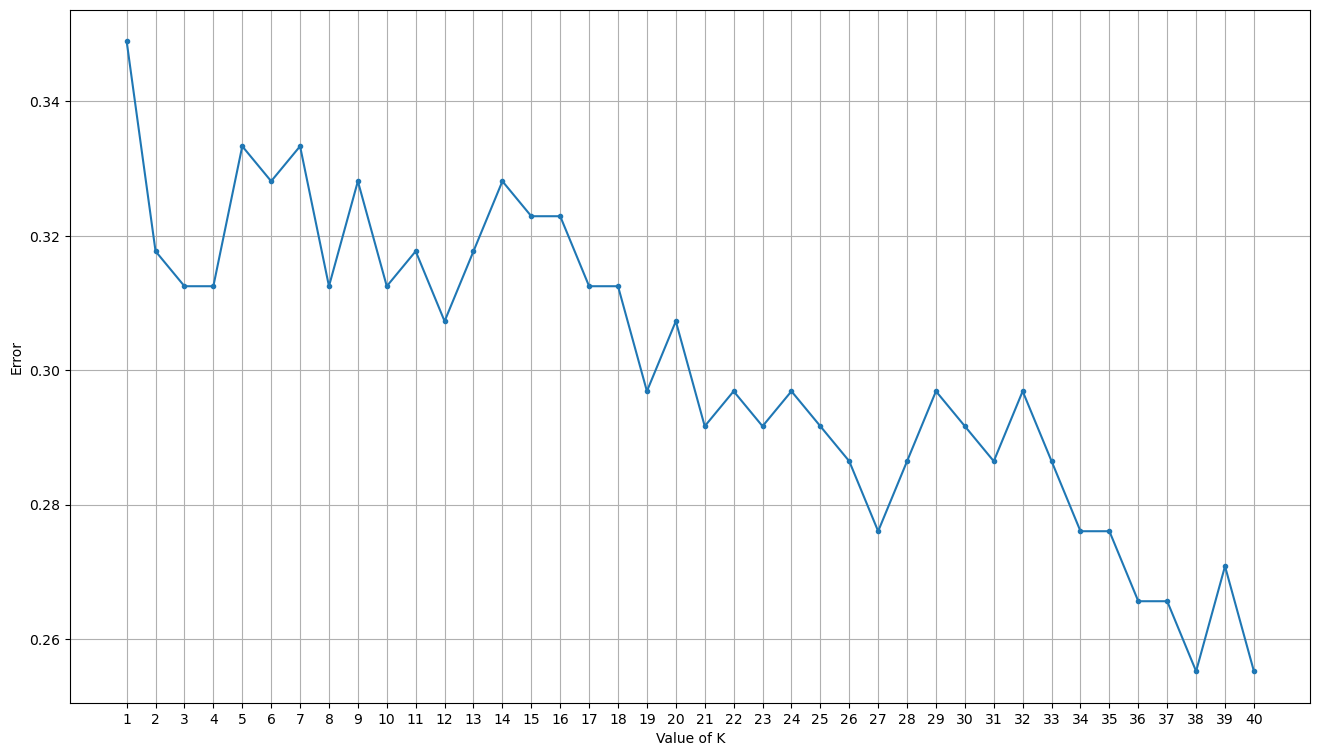

In [18]:
plt.figure(figsize=(16,9))
plt.xlabel('Value of K')
plt.ylabel('Error')
plt.grid()
plt.xticks(range(1, 41))
plt.plot(range(1, 41), error, marker='.')